In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

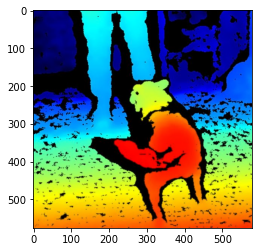

(576, 580, 3)


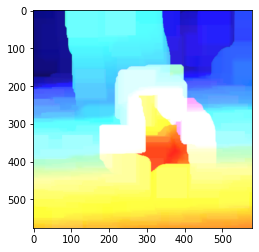

In [2]:
# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('sample_picture.jpg')
img = img[0:, 200:780]
plt.imshow(img)
plt.show()

#dilate image (remove areas of black)
kernel = np.ones((5,5), np.uint8)
img = cv2.dilate(img, kernel, iterations=20)

plt.imshow(img)
vert, horiz, channels = np.shape(img)
print(np.shape(img))

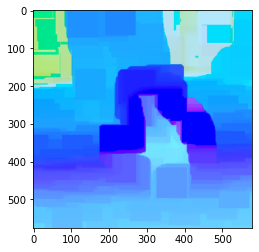

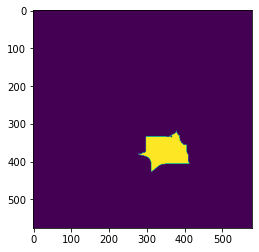

0


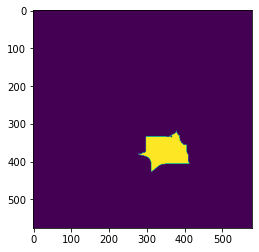

10


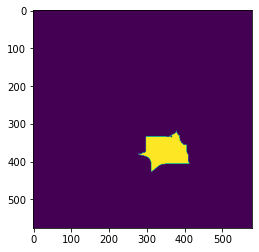

20


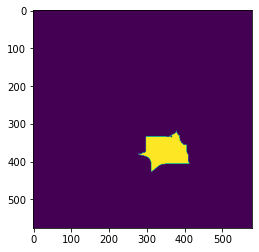

30


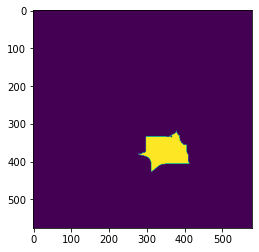

40


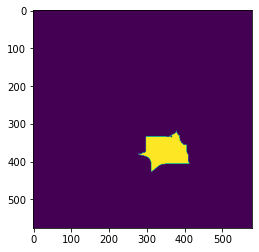

50


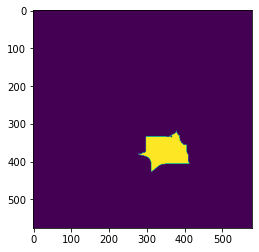

60


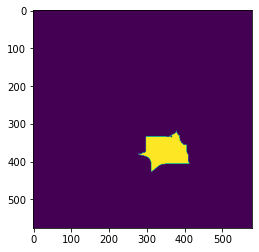

70


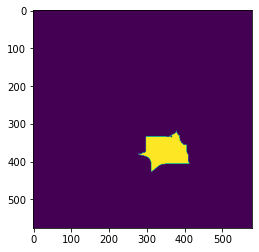

80


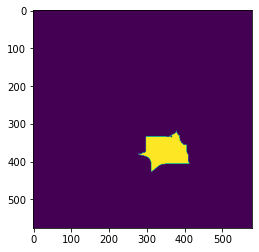

90


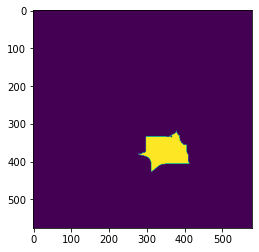

100


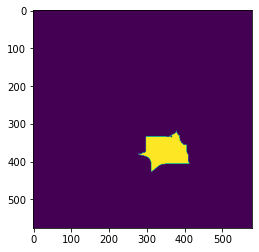

110


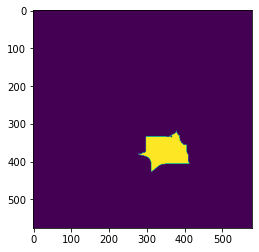

120


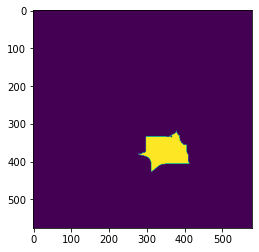

130


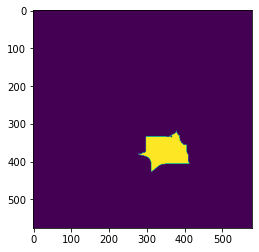

140


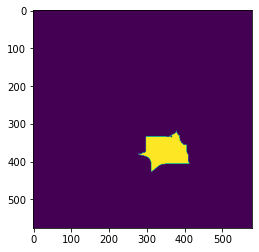

150


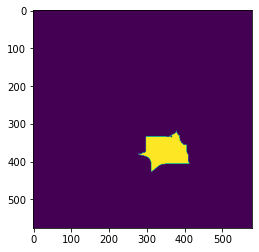

160


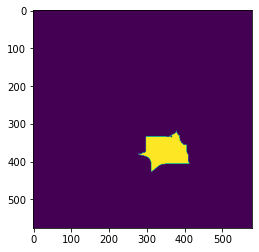

170


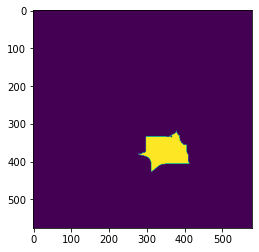

180


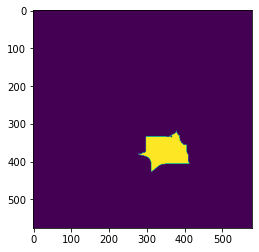

190


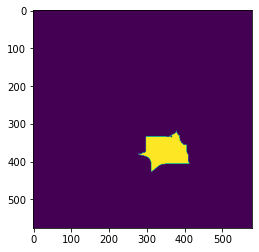

200


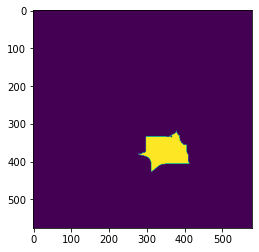

210


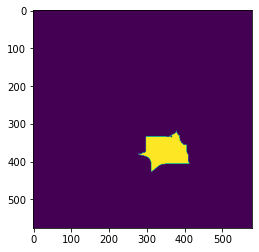

220


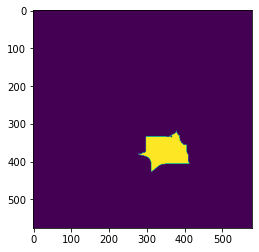

230


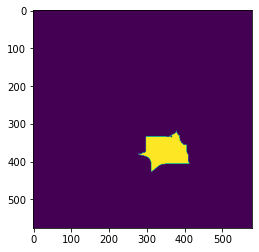

240


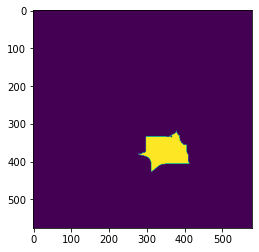

250


In [3]:
#filter for red
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

#parameter checker, choose 1 variable at a time
#range 0-255 for every variable
for i in range(0,255,10):
    lower = np.array([107, 190, 240])
    upper = np.array([120, 255, 255])
    mask = cv2.inRange(hsv, lower, upper) # Masking the image to find our color
    plt.imshow(mask)
    plt.show()

    print(i)

In [4]:
#value of mask at (350,350)
print(mask[350][350])

255


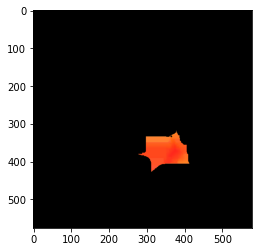

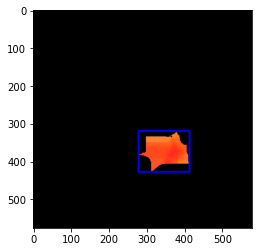

In [6]:
#applys the mask
frame = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(frame)
plt.show()

#find contours of object
cont, hierarch = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(cont) != 0:
    for mask_contour in cont:
        if cv2.contourArea(mask_contour) > 100:
            x, y, w, h = cv2.boundingRect(mask_contour)
            x2 = x + w
            y2 = y + h
            cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 255), 3) #drawing rectangle
            #cv2.circle(frame, (x,y), radius=10, color=(100, 100, 255), thickness=5)
plt.imshow(frame)

In [79]:
#reset img with lines
imgL = frame

center: 11556
right: 3024


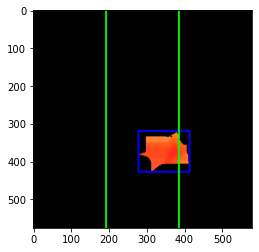

In [81]:
#draw lines

#divide image into zones:
divLeft = round(horiz / 3)
divRight = 2*divLeft

#left line
topLeft = (divLeft, 0)
botLeft = (divLeft, vert)

#right line
topRight = (divRight, 0)
botRight = (divRight, vert)

color = (0, 255, 0)
thickness = 3
imgL = cv2.line(imgL, topLeft, botLeft, color, thickness)
imgL = cv2.line(imgL, topRight, botRight, color, thickness)

#area of image in left (image can be in left, left+center, or left+center+right)
if (x < divLeft):
    #left only
    leftLen = divLeft-x
    leftArea = leftLen*h
    print('left: ' +str(leftArea))
    
    #left+center (LIKELY BUG HERE IF case: left+center+right)
    if (x2 < divRight):
        cenLen = x2-divLeft
        cenArea = cenLen*h
        print('center: '+str(cenArea))
        
    #left+center+right
    if (x2 > divRight):
        rightLen = x2-divRight
        rightArea = rightLen*h
        print(rightArea)
        print('right: '+str(rightArea))

#area of image in right (image can be in right only)
elif (x > divRight):
    rightLen = w
    rightArea = w*h
    print('right: '+str(rightArea))
    
#area of image in center (image can be in center, center+right)
else:
    #center only
    cenLen = divRight-x
    cenArea = cenLen*h
    print('center: '+str(cenArea))

    #center+right
    if (x2 > divRight):
        rightLen = x2-divRight
        rightArea = rightLen*h
        print('right: '+str(rightArea))

plt.imshow(imgL)

In [ ]:
#command generation:
